In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
tracks = np.load('tracks.npy') # (N, T, C)
tracks.shape

In [59]:
# flatten_tracks = [np.concatenate((v_tracks, np.full((len(v_tracks), 1), i)), axis=-1).reshape(-1, v_tracks.shape[-1] + 1).tolist() \
#     for i, v_tracks in enumerate(tracks)]
flatten_tracks = [ track.tolist() + [i] for i, v_tracks in enumerate(tracks) for track in v_tracks] # v_tracks: (T, C), track: (C, )
flatten_tracks = np.array(flatten_tracks)
flatten_tracks = flatten_tracks[flatten_tracks[:, :2].sum(axis=-1) != 0] # remove the padding data.

In [60]:
data = pd.DataFrame(flatten_tracks, columns=['X', 'Y', 'Lane', 'Vehicle'])
data.head()

,X,Y,Lane,Vehicle
0,2.406268,-27.122184,4.0,0.0
1,2.406268,-25.714103,4.0,0.0
2,2.400268,-23.973136,4.0,0.0
3,2.395267,-22.377189,4.0,0.0
4,2.392268,-20.822135,4.0,0.0


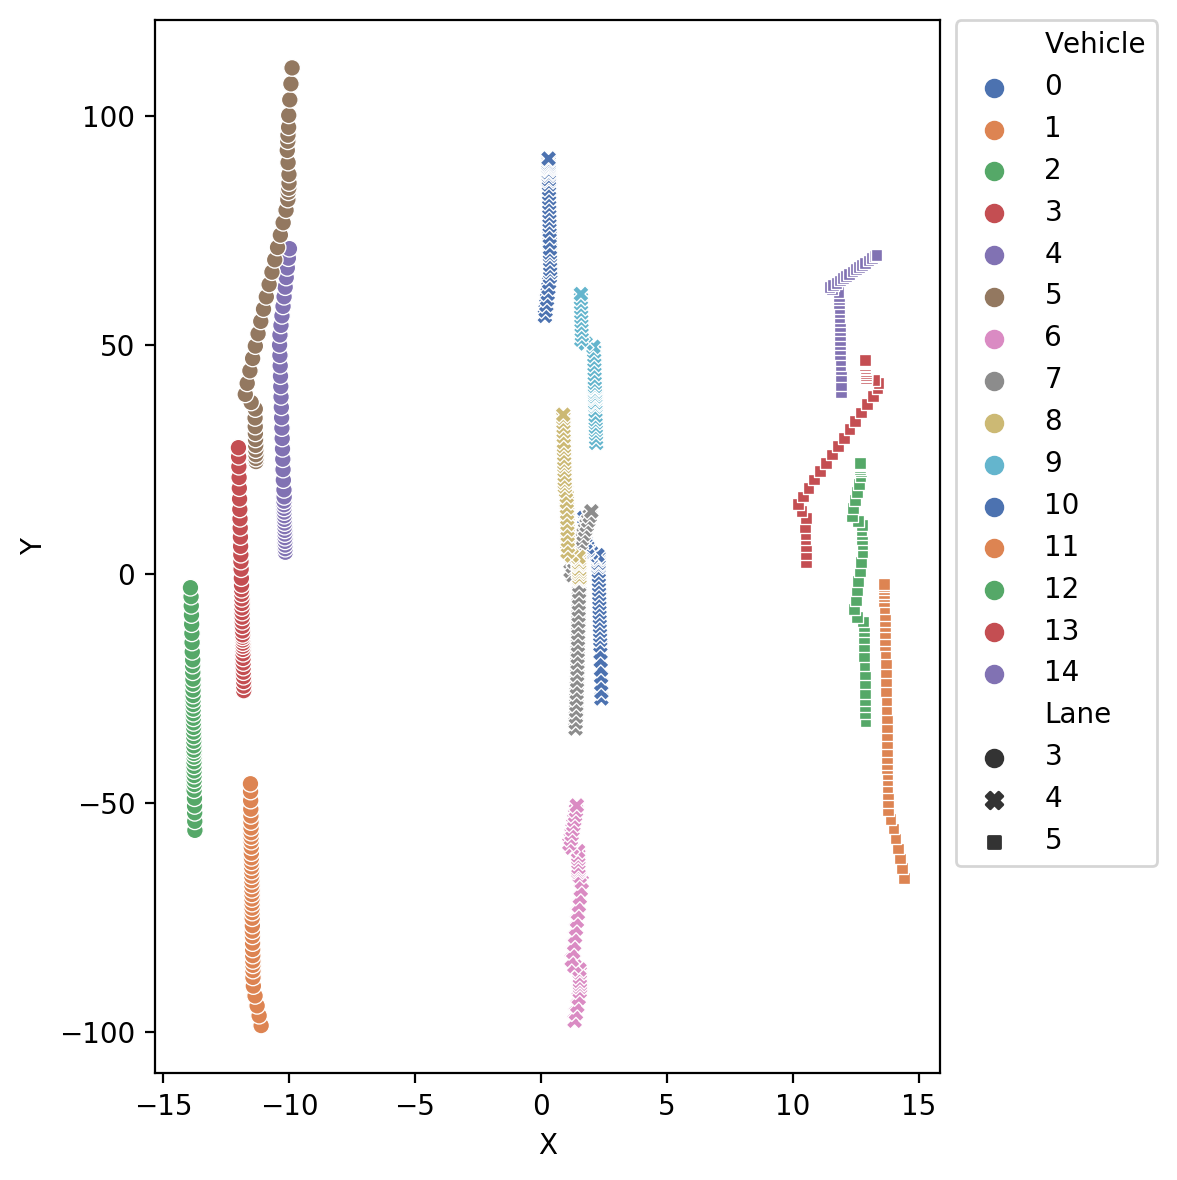

In [48]:
f, ax = plt.subplots(figsize=(6, 6), **{'dpi': 200})
data_dict = {'X': flatten_tracks[:, 0], 'Y': flatten_tracks[:, 1], 'Lane': flatten_tracks[:, 2].astype(int), 'Vehicle': flatten_tracks[:, -1].astype(int)}
sns.scatterplot(data=data_dict, x='X', y='Y', hue='Vehicle', style='Lane', palette='deep', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig('track_plot.pdf', format='pdf')
plt.show()

In [58]:
flatten_tracks[flatten_tracks[:, :2].sum(axis=-1) != 0].shape

(615, 4)